In [1]:
import Functional_Fusion.dataset as ds
import Functional_Fusion.util as ut
import Functional_Fusion.import_data as id
import nibabel as nb 
import Functional_Fusion.array_convert as ac
base_dir = ut.get_base_dir()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import nitools as nt

SyntaxError: invalid syntax. Perhaps you forgot a comma? (dataset.py, line 801)

In [ ]:
dataset = ds.DataSetMDTB(base_dir + '/MDTB')
dataset.extract_all(ses_id='ses-s2',
                    type='CondRun',
                    atlas='MNISymRedNucleus1',
                    smooth=1)

In [7]:
#this extracts data

dataset = ds.DataSetMDTB(base_dir + '/Pontine7T')
dataset.extract_all(ses_id='ses-s1',
                    type='CondRun',
                    atlas='MNISymRedNucleus1',
                    smooth=None)

Atlasmap sub-98
Extract sub-98


AttributeError: 'Series' object has no attribute 'reg_id'

In [7]:
#this gives n_subj x n_cond x n_voxels tensor; it does not extract data 

#X,info,dataset_obj = ds.get_dataset(base_dir,
 #       dataset='MDTB',
  #      atlas='MNISymC2',
   #     sess='ses-s1',
    #    type='CondRun')

X2,info2,dataset_obj2 = ds.get_dataset(base_dir,
        dataset='MDTB',
        atlas='MNISymDentate1',
        sess='ses-s2',
        type='CondRun')



In [9]:
Y,infoY,dataset_objY = ds.get_dataset(base_dir,
        dataset='Language',
        atlas='MNISymDentate1',
        sess='ses-localizer_cond_fm',
        type='CondRun')

#Y2,infoY2,dataset_objY2 = ds.get_dataset(base_dir,
 #       dataset='Language',
  #      atlas='MNISymCereb2',
   #     sess='ses-localizer_cond_fm',
    #    type='CondRun')

In [8]:
#atlas mdtb

data_mdtb = X2

#data_mdtb2 = X2

cond_vec = np.tile(np.arange(1,30),16)

part_vec = np.repeat(np.arange(1,17), 29)

tensor_4d = ac.flat2ndarray(data_mdtb, cond_vec, part_vec)

#tensor_4d2 = ac.flat2ndarray(data_mdtb2, cond_vec, part_vec)

tensor_4d.shape

#cleaning tensor 

tensor_no_nans = np.nan_to_num(tensor_4d)

#tensor_no_nans2 = np.nan_to_num(tensor_4d2)

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1)

#tensor_avg_cond2 = tensor_no_nans2.mean(axis=3, keepdims=1)

tensor_mean_subtract_mdtb = tensor_no_nans - tensor_avg_cond

#tensor_mean_subtract_mdtb2 = tensor_no_nans2 - tensor_avg_cond2

print(data_mdtb.shape)


(24, 976, 3934)


In [10]:
#language 

data_language = Y

#data_language2 = Y2

cond_vec = np.tile(np.arange(1,19),8)

part_vec = np.repeat(np.arange(1,9), 18)

tensor_4d = ac.flat2ndarray(data_language, cond_vec, part_vec)

#tensor_4d2 = ac.flat2ndarray(data_language2, cond_vec, part_vec)

print(tensor_4d.shape)

#print(tensor_4d2.shape)

#cleaning tensor 

tensor_no_nans = np.nan_to_num(tensor_4d)

#tensor_no_nans2 = np.nan_to_num(tensor_4d2)

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1)

#tensor_avg_cond2 = tensor_no_nans2.mean(axis=3, keepdims=1)

tensor_mean_subtract_language = tensor_no_nans - tensor_avg_cond

#tensor_mean_subtract_language2 = tensor_no_nans2 - tensor_avg_cond2


(17, 8, 18, 3934)


In [11]:
#pontine7T


flat_data = ac.get_structure_data(structure='dentate',  data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group')

cond_vec = np.tile(np.arange(1,11),16)

part_vec = np.repeat(np.arange(1,17), 10)

tensor_4d = ac.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = np.nan_to_num(tensor_4d)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_BOLD = tensor_no_nans - tensor_avg_cond

has_nans = np.isnan(tensor_mean_subtract_BOLD).any()


print(tensor_mean_subtract_BOLD.shape)



(16, 16, 10, 3934)


In [12]:
#pontine7T


flat_data = ac.get_structure_data(structure='dentate',  data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = np.tile(np.arange(1,11),16)

part_vec = np.repeat(np.arange(1,17), 10)

tensor_4d = ac.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = np.nan_to_num(tensor_4d)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_7T = tensor_no_nans - tensor_avg_cond

has_nans = np.isnan(tensor_mean_subtract_7T).any()


print(flat_data.shape)



vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nibabel/nifti1.py:618: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current valu

(16, 160, 2385)


In [13]:
#var_mdtb = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_mdtb, criterion='global')
#var_mdtb2 = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_mdtb2, criterion='global')
#var_language = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_language, criterion='global')
#var_language2 = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_language2, criterion='global')
var_7T = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_7T, criterion='global')
var_7T_old = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_BOLD, criterion='global')

#print(var_mdtb)
print(var_7T)
#print(var_7T_old)
#print(var_language)
print(var_7T_old)

[[6.23093164e-05 2.45878924e-03 2.01732410e-01]]
[[0.00021045 0.00223683 0.20263003]]


In [14]:
#var_norm_mdtb = np.zeros((1,3)) #(10,3) means 10 rows, 3 variances; (1,3) means 1 row, 3 variances, etc 
#var_norm_mdtb2 = np.zeros((1,3))
var_norm_7T = np.zeros((1,3))
var_norm_7T_old = np.zeros((1,3))
#var_norm_language = np.zeros((1,3))
#var_norm_language2 = np.zeros((1,3))

for i in range(1): #number of rows 
    #row_sum_mdtb = np.sum(var_mdtb[i])
    #var_norm_mdtb[i] = (var_mdtb[i]/row_sum_mdtb)*100

    #row_sum_mdtb2 = np.sum(var_mdtb2[i])
    #var_norm_mdtb2[i] = (var_mdtb2[i]/row_sum_mdtb2)*100

    row_sum_7T = np.sum(var_7T[i])
    var_norm_7T[i] = (var_7T[i]/row_sum_7T)*100

    row_sum_7T_old = np.sum(var_7T_old[i])
    var_norm_7T_old[i] = (var_7T[i]/row_sum_7T_old)*100
    
    #row_sum_lang = np.sum(var_language[i])
    #var_norm_language[i] = (var_language[i]/row_sum_lang)*100

    #row_sum_lang2 = np.sum(var_language2[i])
    #var_norm_language2[i] = (var_language2[i]/row_sum_lang2)*100


#print(var_norm_mdtb[0][0] + var_norm_mdtb[0][1] + var_norm_mdtb[0][2])

#print(var_norm_mdtb)
print(var_norm_7T)
print(var_norm_7T_old)
#print(var_norm_language2)


[[3.05058732e-02 1.20379290e+00 9.87657012e+01]]
[[3.03833305e-02 1.19895724e+00 9.83689576e+01]]


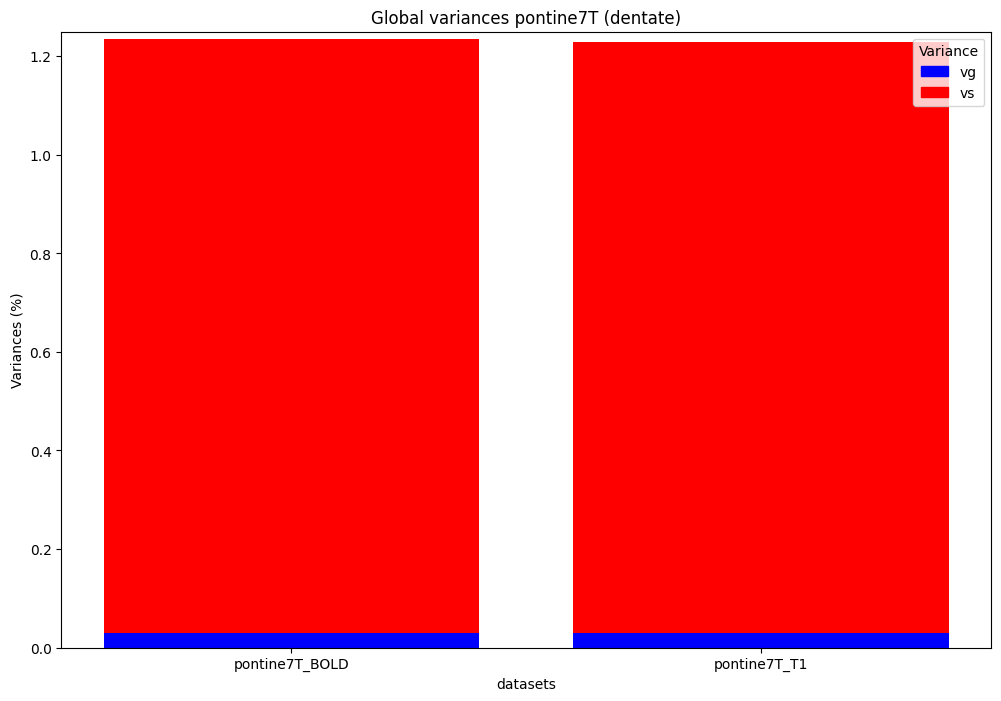

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Example data
data = {
    'datasets': ['pontine7T_BOLD', 'pontine7T_T1'],
    #'vg_mdtb': var_norm_mdtb[:, 0],
    #'vs_mdtb': var_norm_mdtb[:, 1],
    #'vg_mdtb2': var_norm_mdtb2[:, 0],
    #'vs_mdtb2': var_norm_mdtb2[:, 1],
    #'vg_language': var_norm_language[:, 0],
    #'vs_language' : var_norm_language[:,1],
    #'vg_language2': var_norm_language2[:, 0],
    #'vs_language2' : var_norm_language2[:,1],
     'vg_7T_old': var_norm_7T_old[:, 0],
    'vs_7T_old': var_norm_7T_old[:, 1],
    'vg_7T': var_norm_7T[:, 0],
    'vs_7T': var_norm_7T[:, 1]
}

# Reshape the data into long format
df_stacked = pd.DataFrame({
    'datasets': data['datasets'] * len(data['vg_7T_old']),
    'vg': list(data['vg_7T']) + list(data['vg_7T_old']),
    'vs': list(data['vs_7T']) + list(data['vs_7T_old'])  
})

# Plotting
plt.figure(figsize=(12, 8))

# Separate positive and negative values for 'vg' and 'vs'
vg_positive = df_stacked['vg'].clip(lower=0)
vg_negative = df_stacked['vg'].clip(upper=0)
vs_positive = df_stacked['vs'].clip(lower=0)
vs_negative = df_stacked['vs'].clip(upper=0)

# Plot positive 'vg' and 'vs' (no labels to avoid duplicate legend entries)
plt.bar(df_stacked['datasets'], vg_positive, color='blue')
plt.bar(df_stacked['datasets'], vs_positive, bottom=vg_positive, color='red')

# Plot negative 'vg' and 'vs' (no labels to avoid duplicate legend entries)
plt.bar(df_stacked['datasets'], vg_negative, color='blue')
plt.bar(df_stacked['datasets'], vs_negative, bottom=vg_negative, color='red')

# Create custom legend
vg_patch = mpatches.Patch(color='blue', label='vg')
vs_patch = mpatches.Patch(color='red', label='vs')
plt.legend(handles=[vg_patch, vs_patch], title='Variance', loc='upper right')

# Customize the plot
plt.xlabel('datasets')
plt.ylabel('Variances (%)')
plt.title('Global variances pontine7T (dentate)')
plt.ylim(0, 1.25)
plt.show()


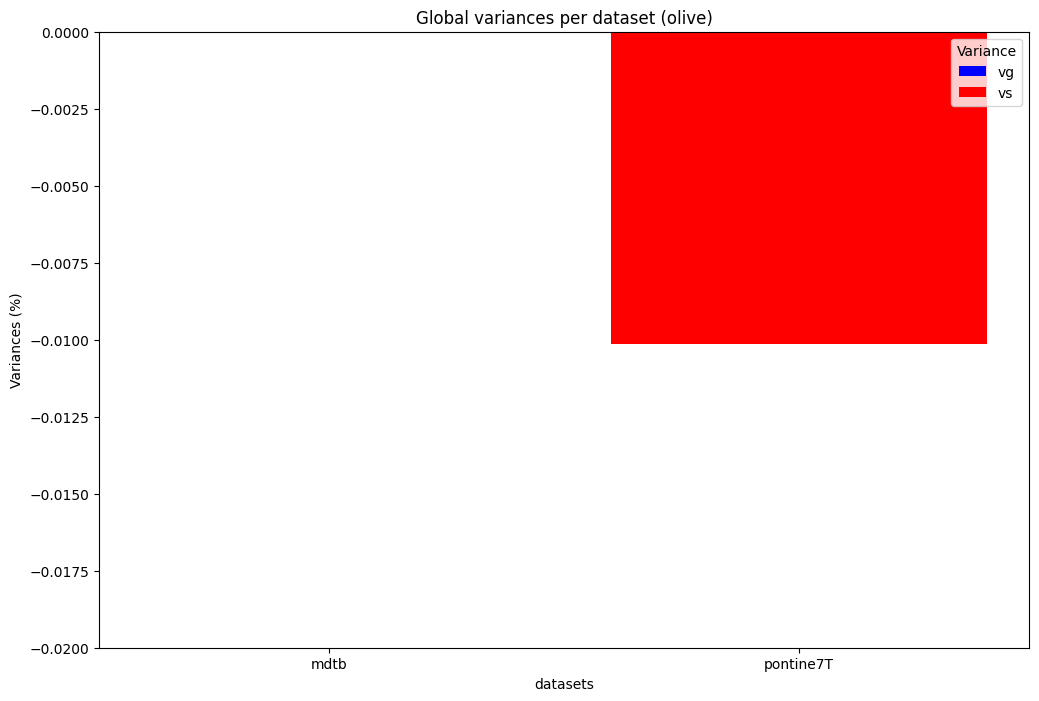

In [54]:
#plot global variances for each ROI

data = {
    'datasets': ['mdtb', 'pontine7T'],
    'vg_mdtb': var_norm_mdtb[:, 0],
    'vs_mdtb': var_norm_mdtb[:, 1],
    'vg_7T': var_norm_7T[:, 0],
    'vs_7T': var_norm_7T[:, 1]
}

# Reshape the data into long format
df_stacked = pd.DataFrame({
    'datasets': data['datasets'] * len(data['vg_mdtb']),  # Repeat each dataset label for each observation
    'vg': list(data['vg_mdtb']) + list(data['vg_7T']),   # Concatenate vg values for both datasets
    'vs': list(data['vs_mdtb']) + list(data['vs_7T'])    # Concatenate vs values for both datasets
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot 'vg' as the base part of the bar
plt.bar(df_stacked['datasets'], df_stacked['vg'], label='vg', color='blue')

# Stack 'vs' on top of 'vg'
plt.bar(df_stacked['datasets'], df_stacked['vs'], bottom=df_stacked['vg'], label='vs', color='red')

# Customize the plot
plt.xlabel('datasets')
plt.ylabel('Variances (%)')
plt.title('Global variances per dataset (olive)')
plt.legend(title='Variance', loc='upper right')
plt.ylim(-0.02,0)
plt.show()

In [21]:

source_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/suit/anatomicals/S08'

dest_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion/Pontine7T/derivatives/sub-08/suit'
anat_name = 'S08_T1w'
id.import_suit(source_dir,dest_dir,anat_name,'sub-08')


skipping /maskbrainSUITGrey.nii


In [48]:
import glob 
import os 


subject = 'sub-07'

source_dir = f'/Volumes/diedrichsen_data$/data/FunctionalFusion/Pontine7T/derivatives/{subject}/estimates2/ses-s1'

files = sorted(glob.glob(f'{source_dir}/{subject}_ses-01_run*'))

for i in range(1,10):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_000{i}.nii', f'{source_dir}/{subject}_ses-01_run-01_000{i}.nii')

for i in range(10,11):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-01_00{i}.nii')

for i in range(11,21):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-02_00{i}.nii')

for i in range(21,31):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-03_00{i}.nii')

for i in range(31,41):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-04_00{i}.nii')

for i in range(41,51):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-05_00{i}.nii')

for i in range(51,61):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-06_00{i}.nii')

for i in range(61,71):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-07_00{i}.nii')

for i in range(71,81):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-08_00{i}.nii')

for i in range(81,91):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-09_00{i}.nii')

for i in range(91,100):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_00{i}.nii', f'{source_dir}/{subject}_ses-01_run-10_00{i}.nii')

for i in range(100,101):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-10_0{i}.nii')

for i in range(101,111):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-11_0{i}.nii')

for i in range(111,121):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-12_0{i}.nii')

for i in range(121,131):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-13_0{i}.nii')

for i in range(131,141):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-14_0{i}.nii')

for i in range(141,151):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-15_0{i}.nii')

for i in range(151,161):
    os.rename(f'{source_dir}/{subject}_ses-01_run-_0{i}.nii', f'{source_dir}/{subject}_ses-01_run-16_0{i}.nii')



In [45]:
subject = 'sub-07'

source_dir = f'/Volumes/diedrichsen_data$/data/FunctionalFusion/Pontine7T/derivatives/{subject}/estimates2/ses-s1'

for run_idx in range(1,17):
    run = f'run-{run_idx:02d}'
    
    files = sorted(glob.glob(f'{source_dir}/{subject}_ses-01_{run}*'))

    for file_idx, file in enumerate(files):
        os.rename(file, f'{source_dir}/{subject}_ses-01_{run}_reg-{file_idx:02d}_beta.nii')